### Case Study : Logistic Regrerssion Case Study 

### Problem Statement:

Design a Logistic Regression model to correctly classify the customer based on the given set of  attributes into two categories - whether the customer will be able to repay the loan or will it possibly result into NPA (Non-performing Account). The notion is that bank should not loose good a customer or retain a defaulter customer because of "False Alarm".

#### Import Libraries 

In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [415]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [416]:
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

#### Import dataset and perform EDA

In [417]:
df = pd.read_csv('train.csv')
df.shape

(396030, 27)

In [418]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [419]:
#Check for dupliicate values
df.duplicated().sum()

0

In [420]:
#Check for null values
df.isna().sum().sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
loan_amnt                   0
dti                         0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
purpose                     0
term                        0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
address                     0
dtype: int64

In [421]:
#Check for percentage of null values
round(df.isna().sum()/len(df)*100,2).sort_values(ascending=False)

mort_acc                9.54
emp_title               5.79
emp_length              4.62
title                   0.44
pub_rec_bankruptcies    0.14
revol_util              0.07
loan_amnt               0.00
dti                     0.00
application_type        0.00
initial_list_status     0.00
total_acc               0.00
revol_bal               0.00
pub_rec                 0.00
open_acc                0.00
earliest_cr_line        0.00
purpose                 0.00
term                    0.00
loan_status             0.00
issue_d                 0.00
verification_status     0.00
annual_inc              0.00
home_ownership          0.00
sub_grade               0.00
grade                   0.00
installment             0.00
int_rate                0.00
address                 0.00
dtype: float64

In [422]:
#Check dataframe.info(). Get the null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [423]:
#Missing Value Treatments upon analysis
#NaN values are replaced as below

In [424]:
df.loc[df['emp_title'].isna(),'emp_title'] = 'No Employee Title'
df.loc[df['emp_length'].isna(),'emp_length'] = 'Unavailable'
df.loc[df['title'].isna(),'title'] = 'Unavailable'
df.loc[df['revol_util'].isna(),'revol_util'] = 0.0
df.loc[df['mort_acc'].isna(),'mort_acc'] = 0.0
df.loc[df['pub_rec_bankruptcies'].isna(),'pub_rec_bankruptcies'] = 0.0

In [425]:
#Check for missing values
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [426]:
#Get stats of numeric/continuous variables
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,396030.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.754260,25.414744,1.640873,0.121483
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.484857,11.886991,2.111249,0.355962
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [427]:
#Get stats of categorical variables
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030
unique,2,7,35,173106,12,6,3,115,2,14,48818,684,2,3,393700
top,36 months,B,B3,No Employee Title,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,22927,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


#### Feature Engineering

In [428]:
#Perform Encoding
df.loc[df['pub_rec'] >= 1,'pub_rec'] = 1
df.loc[df['mort_acc'] >= 1, 'mort_acc'] = 1
df.loc[df['pub_rec_bankruptcies'] >= 1, 'pub_rec_bankruptcies'] = 1
df.loc[df['term'] ==' 36 months', 'term'] = 36
df.loc[df['term'] ==' 60 months', 'term'] = 60
df['term'] = df['term'].astype('int64')

In [429]:
#Split issue_date into month and year
df[['issue_month', 'issue_year']] = df['issue_d'].str.split('-', expand=True)
df.drop(['issue_d'], axis=1, inplace=True)

In [430]:
#Split er_cr_line date into month and year
df[['er_cr_line_m', 'er_cr_line_y']] = df['earliest_cr_line'].str.split('-', expand=True)
df.drop(['earliest_cr_line'], axis=1, inplace=True)

In [431]:
#Split address into State and Zip code
df[['address_state', 'address_zip']] = df['address'].str.split(','
                                                               , expand=True)[1].str.split(' '
                                                                ,expand=True)[[1,2]]
df.drop(['address'], axis=1, inplace=True)

In [432]:
#Make emp_title, purpose and title as uppercase fields
df['emp_title'] = df['emp_title'].str.upper()
df['purpose'] = df['purpose'].str.upper()
df['title'] = df['title'].str.upper()

#### Outliers Detection

In [433]:
df1 = df.copy()

In [434]:
#Removing some extreme outliers values for annual income
print(np.percentile(df['annual_inc'], 50))
print(np.percentile(df['annual_inc'], 99))
print(np.percentile(df['annual_inc'], 99.99))
print(round(df.loc[df['annual_inc'] > 210000.0].shape[0]/len(df),2)*100)
df = df.loc[~(df['annual_inc'] > np.percentile(df['annual_inc'], 99))]

64000.0
250000.0
1250000.0
2.0


In [435]:
#Removing some extreme outliers values for pub_rec
print(np.percentile(df['pub_rec'], 50))
print(np.percentile(df['pub_rec'], 99))
print(np.percentile(df['pub_rec'], 99.99))
print(round(df.loc[df['pub_rec'] > 9.0].shape[0]/len(df),2)*100)
df = df.loc[~(df['pub_rec'] > np.percentile(df['pub_rec'], 99.99))]

0.0
1.0
1.0
0.0


In [436]:
#Removing some extreme outliers values for pub_rec_bankruptcies
print(np.percentile(df['pub_rec_bankruptcies'], 50))
print(np.percentile(df['pub_rec_bankruptcies'], 99))
print(np.percentile(df['pub_rec_bankruptcies'], 99.99))
print(round(df.loc[df['pub_rec_bankruptcies'] > 5.0].shape[0]/len(df),2)*100)
df = df.loc[~(df['pub_rec_bankruptcies'] > np.percentile(df['pub_rec_bankruptcies'], 99.99))]

0.0
1.0
1.0
0.0


In [437]:
#Define Outlier Detection function based on IQR and Percentile

def detect_outliers(df,col):
    q1 = np.quantile(df[col],0.25)
    q3 = np.quantile(df[col],0.75)
    iqr = q3-q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    outlier = df.loc[(df[col] < lb) | (df[col] > ub)]
    return round(outlier.shape[0]/df.shape[0]*100,2)

def detect_outliers_percentile(df,col):
    q1 = np.quantile(df[col],0.25)
    q3 = np.quantile(df[col],0.75)
    p = np.percentile(df[col],99.99)
    iqr = q3-q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    outlier = df.loc[(df[col] < lb) | (df[col] > p)]
    return round(outlier.shape[0]/df.shape[0]*100,2)

In [438]:
#Print percentage of outliers for each cont. variable 
print(f"Outlier Percentage")
print(f"loan_amnt            = {detect_outliers(df,'loan_amnt')}%")
print(f"int_rate             = {detect_outliers(df,'int_rate')}%")
print(f"installment          = {detect_outliers(df,'installment')}%")
print(f"annual_inc           = {detect_outliers(df,'annual_inc')}%")
print(f"dti                  = {detect_outliers(df,'dti')}%")
print(f"open_acc             = {detect_outliers(df,'open_acc')}%")
print(f"pub_rec              = {detect_outliers_percentile(df,'pub_rec')}%")
print(f"revol_bal            = {detect_outliers(df,'revol_bal')}%")
print(f"revol_util           = {detect_outliers(df,'revol_util')}%")
print(f"total_acc            = {detect_outliers(df,'total_acc')}%")
print(f"mort_acc             = {detect_outliers(df,'mort_acc')}%")
print(f"pub_rec_bankruptcies = {detect_outliers(df,'pub_rec_bankruptcies')}%")

Outlier Percentage
loan_amnt            = 0.04%
int_rate             = 0.79%
installment          = 2.74%
annual_inc           = 3.52%
dti                  = 0.07%
open_acc             = 2.57%
pub_rec              = 0.0%
revol_bal            = 5.23%
revol_util           = 0.0%
total_acc            = 2.11%
mort_acc             = 0.0%
pub_rec_bankruptcies = 11.45%


#### Outliers Treatment

In [439]:
#Define function to remove outliers based on IQR 

def remove_outliers(df,col):
    q1 = np.quantile(df[col],0.25)
    q3 = np.quantile(df[col],0.75)
    iqr = q3-q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    return df.loc[~((df[col] < lb) | (df[col] > ub))]

# def remove_outliers_percentile(df,col):
#     q1 = np.quantile(df[col],0.25)
#     q3 = np.quantile(df[col],0.75)
#     p = np.percentile(df[col],99.99)
#     iqr = q3-q1
#     lb = q1 - 1.5*iqr
#     ub = q3 + 1.5*iqr
#     return df.loc[~((df[col] < lb) | (df[col] > p))]

In [440]:
#Remove outliers from cont. variables mentioned below
df = remove_outliers(df, 'loan_amnt')
df = remove_outliers(df, 'int_rate')
df = remove_outliers(df, 'installment')
df = remove_outliers(df, 'annual_inc')
df = remove_outliers(df, 'dti')
df = remove_outliers(df, 'pub_rec')
df = remove_outliers(df, 'revol_bal')
df = remove_outliers(df, 'revol_util')
df = remove_outliers(df, 'open_acc')
df = remove_outliers(df, 'total_acc')
df = remove_outliers(df, 'mort_acc')
df = remove_outliers(df, 'pub_rec_bankruptcies')

#### Univariate/Bivariate Analysis

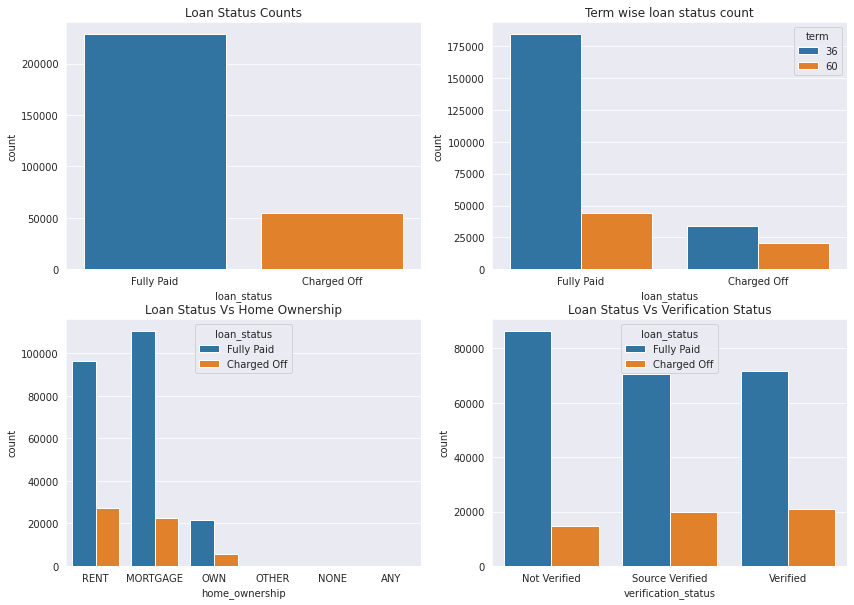

In [441]:
#Countplots of various categorical features w.r.t. to target variable loan_status
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.countplot(data=df, x='loan_status')
plt.title('Loan Status Counts')
plt.subplot(2,2,2)
sns.countplot(data=df, x='loan_status', hue='term')
plt.title('Term wise loan status count')
plt.subplot(2,2,3)
sns.countplot(data=df, x='home_ownership', hue='loan_status')
plt.title('Loan Status Vs Home Ownership')
plt.subplot(2,2,4)
sns.countplot(data=df, x='verification_status', hue='loan_status')
plt.title('Loan Status Vs Verification Status')
plt.show()

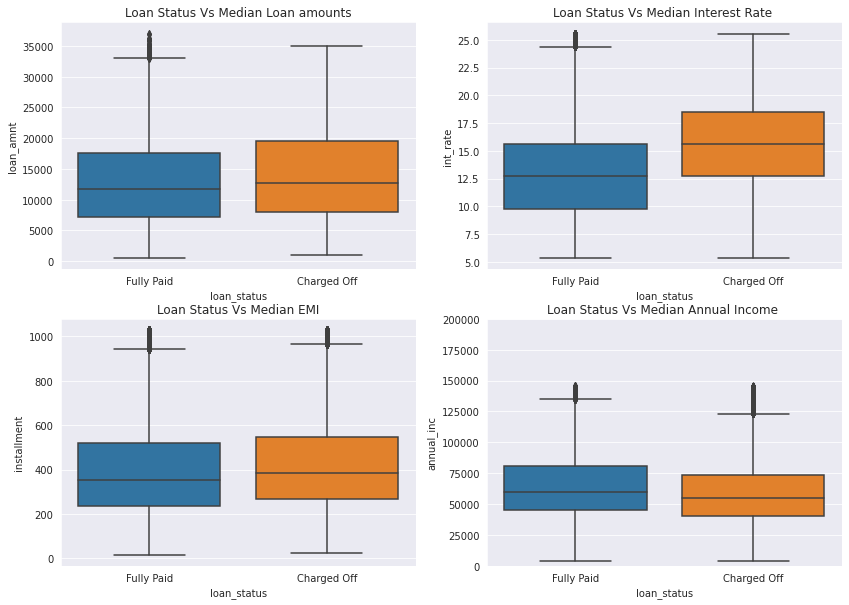

In [442]:
#Boxplot of various cont. features w.r.t. target variable loan_status
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(data=df, x='loan_status', y='loan_amnt')
plt.title('Loan Status Vs Median Loan amounts')
plt.subplot(2,2,2)
sns.boxplot(data=df, x='loan_status', y='int_rate')
plt.title('Loan Status Vs Median Interest Rate ')
plt.subplot(2,2,3)
sns.boxplot(data=df, x='loan_status', y='installment')
plt.title('Loan Status Vs Median EMI')
plt.subplot(2,2,4)
sns.boxplot(data=df, x='loan_status', y='annual_inc')
plt.ylim(bottom=0, top=200000)
plt.title('Loan Status Vs Median Annual Income ')
plt.show()

Observation1: Median interest rate of Charged Off customers is significantly higher than those of Fully Paid

Observation2: Median annual income of Charged Off customers is lower than those of Fully Paid

Observation3: Median EMI of Charged Off is higher than those of Fully Paid

Observation4: Median loan amount of Charged Off is higher than those of Fully Paid

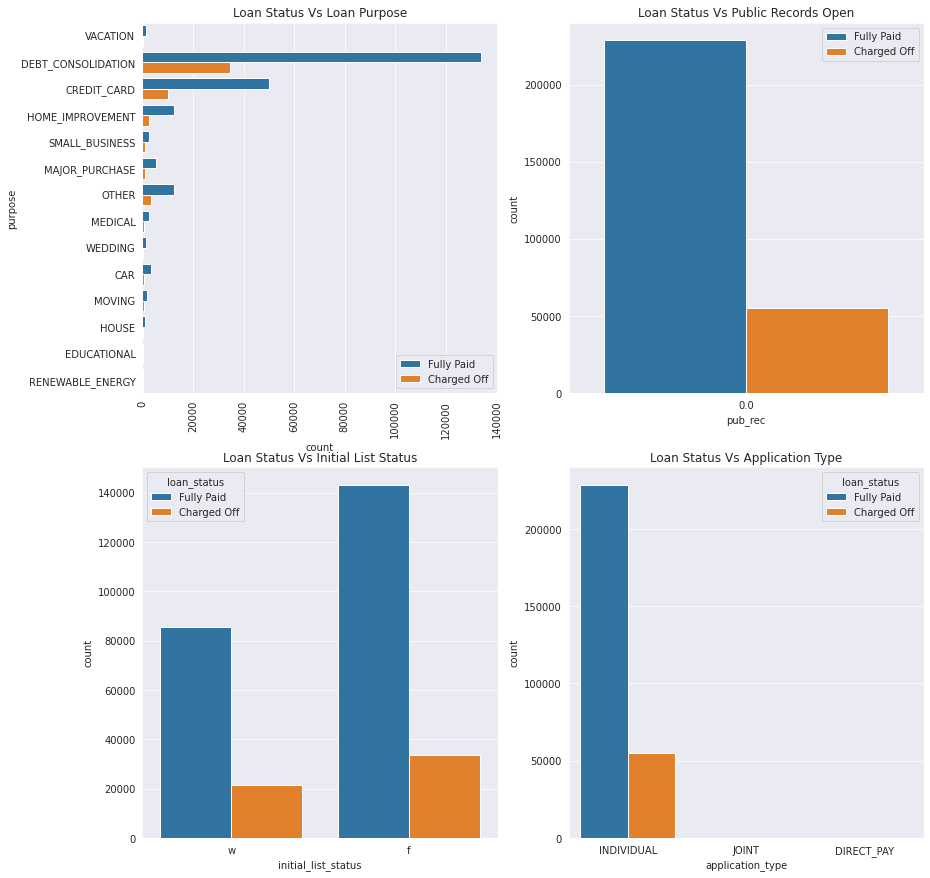

In [443]:
#Countplot of categorical variables w.r.t. target variable loan_status
plt.figure(figsize=(14,15))
plt.subplot(2,2,1)
sns.countplot(data=df, y='purpose', hue='loan_status')
plt.xticks(rotation=90)
plt.title('Loan Status Vs Loan Purpose')
plt.legend(loc=4)
plt.subplot(2,2,2)
sns.countplot(data=df, x='pub_rec',hue='loan_status')
#plt.xlim(left=0,right=10)
plt.title('Loan Status Vs Public Records Open')
plt.legend(loc=1)
plt.subplot(2,2,3)
sns.countplot(data=df, x='initial_list_status', hue='loan_status')
plt.title('Loan Status Vs Initial List Status')
plt.subplot(2,2,4)
sns.countplot(data=df, x='application_type',hue='loan_status')
#plt.xlim(left=0,right=10)
plt.title('Loan Status Vs Application Type')
#plt.legend(loc=1)
plt.show()

Observation1: Top 2 loan purpose categories are Debit Consolidation and Credit Card

Observation2: Topmost loan type application is INDIVIDUAL

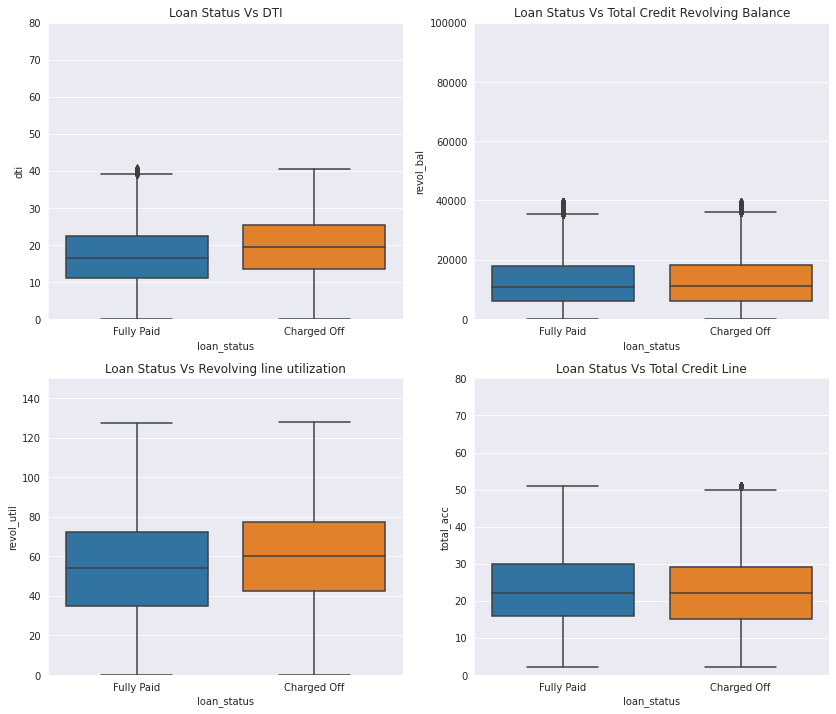

In [444]:
#Box plot of various cont. features w.r.t. target variable loan_status

plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
sns.boxplot(data=df, x='loan_status', y='dti')
plt.ylim(bottom=0,top=80)
plt.title('Loan Status Vs DTI')
plt.subplot(2,2,2)
sns.boxplot(data=df, x='loan_status', y='revol_bal')
plt.ylim(bottom=0, top=100000)
plt.title('Loan Status Vs Total Credit Revolving Balance')
plt.subplot(2,2,3)
sns.boxplot(data=df, x='loan_status', y='revol_util')
plt.ylim(bottom=0,top=150)
plt.title('Loan Status Vs Revolving line utilization')
plt.subplot(2,2,4)
sns.boxplot(data=df, x='loan_status', y='total_acc')
plt.ylim(bottom=0, top=80)
plt.title('Loan Status Vs Total Credit Line')
plt.show()

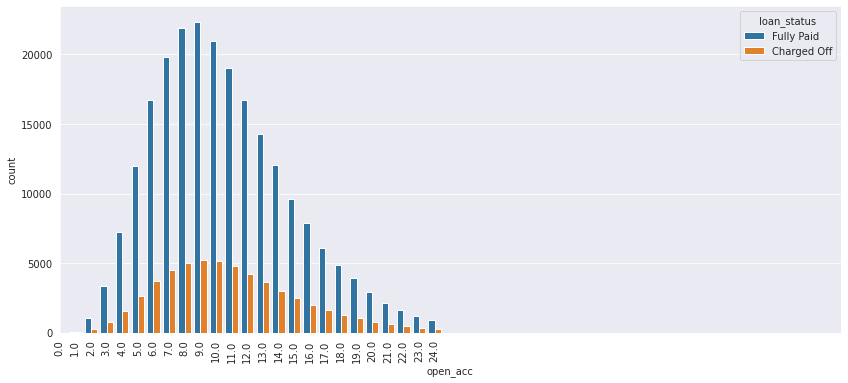

In [445]:
#Countplot of categorical variable open_acc w.r.t. target variable loan_status

plt.figure(figsize=(14,6))
sns.countplot(data=df, x='open_acc',hue='loan_status')
plt.xlim(left=0,right=50)
plt.xticks(rotation=90)
plt.show()

Observation1: open_acc is fairly graphically normall distributed
    
Observation2: Charged Off and Fully Paid have same distribution

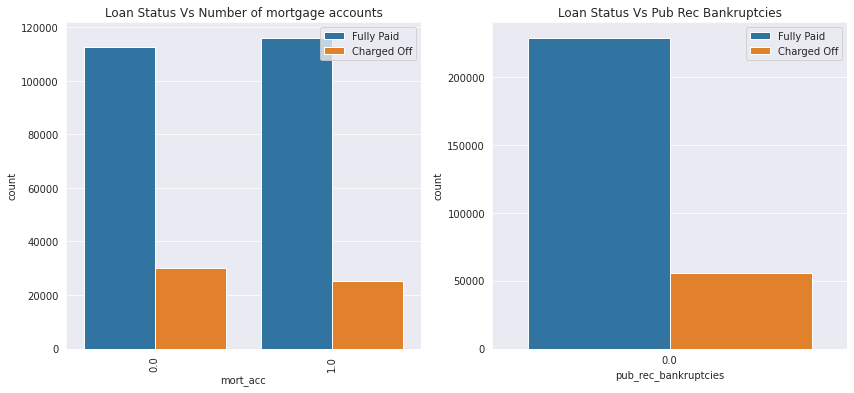

In [446]:
#Countplot for various categorical features w.r.t. target variable loan_status

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(data=df, x='mort_acc',hue='loan_status')
plt.xticks(rotation=90)
plt.title('Loan Status Vs Number of mortgage accounts')
plt.legend(loc=1)
plt.subplot(1,2,2)
sns.countplot(data=df, x='pub_rec_bankruptcies',hue='loan_status')
#plt.xlim(left=0,right=10)
plt.title('Loan Status Vs Pub Rec Bankruptcies')
plt.legend(loc=1)
plt.show()

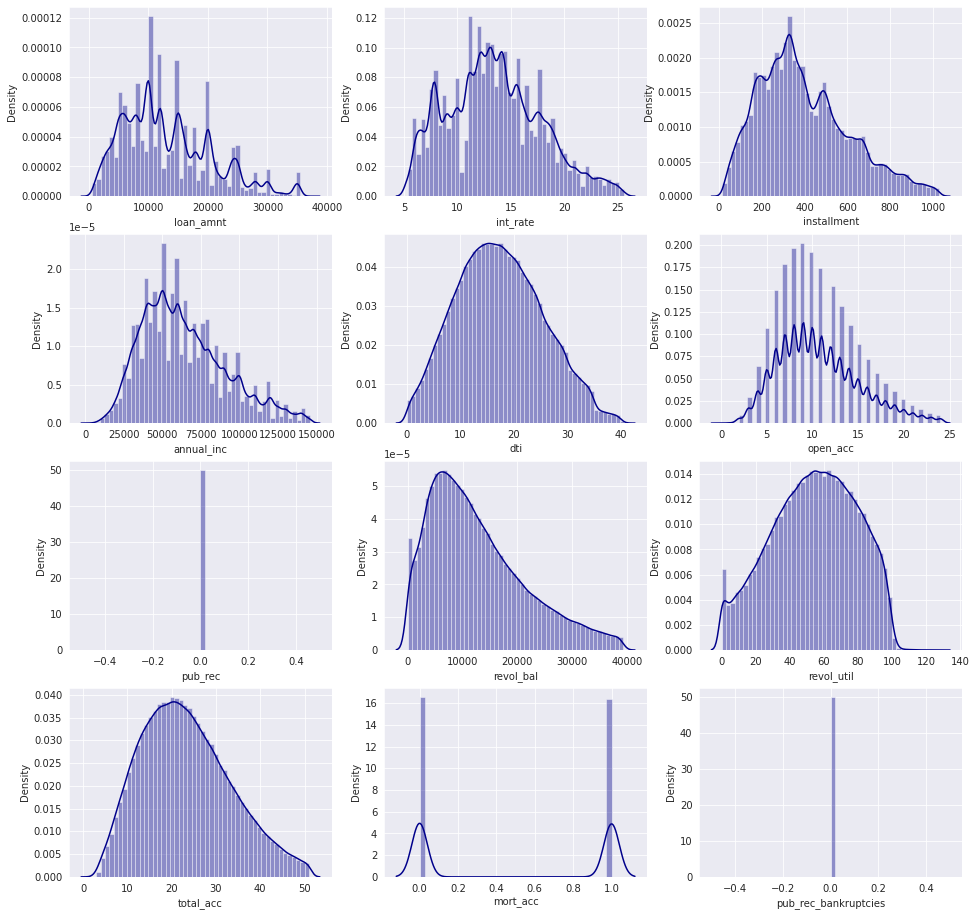

In [447]:
#Distribution plot for cont. variables

fig,axes = plt.subplots(4,3,figsize=(16,16))
sns.distplot(df['loan_amnt'],ax=axes[0,0],color='darkblue')
sns.distplot(df['int_rate'],ax=axes[0,1],color='darkblue')
sns.distplot(df['installment'],ax=axes[0,2],color='darkblue')
sns.distplot(df['annual_inc'],ax=axes[1,0],color='darkblue')
sns.distplot(df['dti'],ax=axes[1,1],color='darkblue')
sns.distplot(df['open_acc'],ax=axes[1,2],color='darkblue')
sns.distplot(df['pub_rec'],ax=axes[2,0],color='darkblue')
sns.distplot(df['revol_bal'],ax=axes[2,1],color='darkblue')
sns.distplot(df['revol_util'],ax=axes[2,2],color='darkblue')
sns.distplot(df['total_acc'],ax=axes[3,0],color='darkblue')
sns.distplot(df['mort_acc'],ax=axes[3,1],color='darkblue')
sns.distplot(df['pub_rec_bankruptcies'],ax=axes[3,2],color='darkblue')
plt.show()

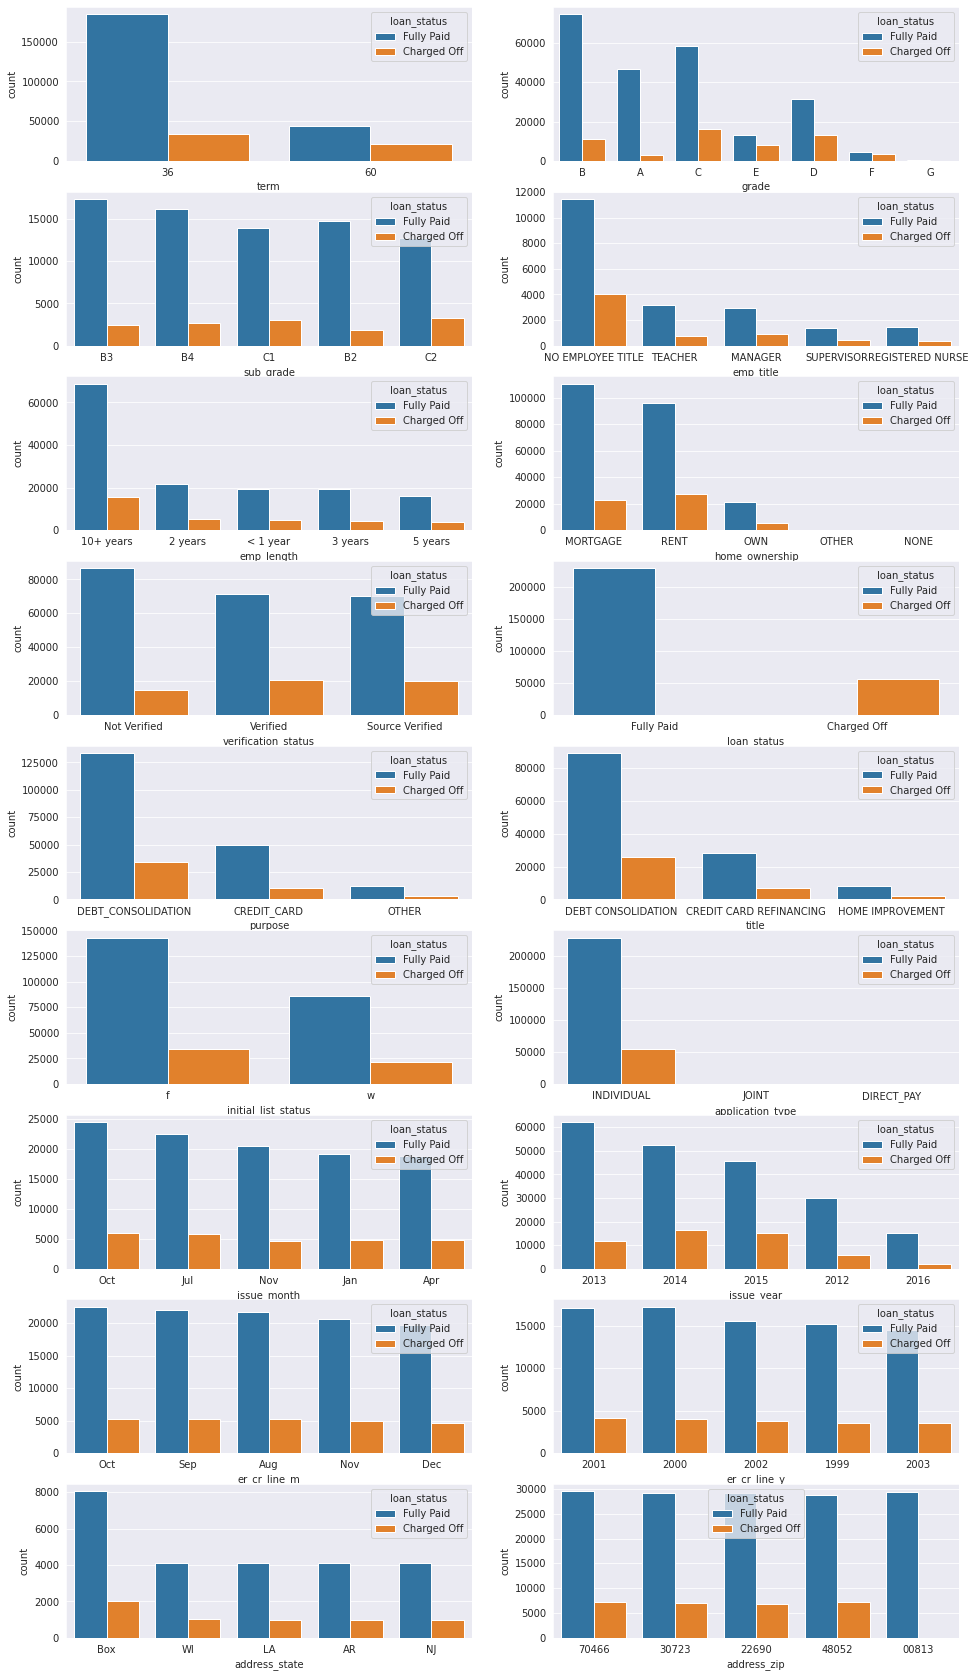

In [448]:
#Countplots for categorical variables

top = 5
fig,axes = plt.subplots(9,2,figsize=(16,30))
sns.countplot(df['term'],ax=axes[0,0],hue=df['loan_status'])
sns.countplot(df['grade'],ax=axes[0,1],hue=df['loan_status'])
sns.countplot(df['sub_grade'],ax=axes[1,0],hue=df['loan_status'],order=df['sub_grade'].value_counts().iloc[:top].index)
sns.countplot(df['emp_title'],ax=axes[1,1],hue=df['loan_status'],order=df['emp_title'].value_counts().iloc[:top].index)
sns.countplot(df['emp_length'],ax=axes[2,0],hue=df['loan_status'],order=df['emp_length'].value_counts().iloc[:top].index)
sns.countplot(df['home_ownership'],ax=axes[2,1],hue=df['loan_status'],order=df['home_ownership'].value_counts().iloc[:top].index)
sns.countplot(df['verification_status'],ax=axes[3,0],hue=df['loan_status'],order=df['verification_status'].value_counts().iloc[:top].index)
sns.countplot(df['loan_status'],ax=axes[3,1],hue=df['loan_status'],order=df['loan_status'].value_counts().iloc[:top].index)
sns.countplot(df['purpose'],ax=axes[4,0],hue=df['loan_status'],order=df['purpose'].value_counts().iloc[:3].index)
sns.countplot(df['title'],ax=axes[4,1],hue=df['loan_status'],order=df['title'].value_counts().iloc[:3].index)
sns.countplot(df['initial_list_status'],ax=axes[5,0],hue=df['loan_status'],order=df['initial_list_status'].value_counts().iloc[:top].index)
sns.countplot(df['application_type'],ax=axes[5,1],hue=df['loan_status'],order=df['application_type'].value_counts().iloc[:top].index)
sns.countplot(df['issue_month'],ax=axes[6,0],hue=df['loan_status'],order=df['issue_month'].value_counts().iloc[:top].index)
sns.countplot(df['issue_year'],ax=axes[6,1],hue=df['loan_status'],order=df['issue_year'].value_counts().iloc[:top].index)
sns.countplot(df['er_cr_line_m'],ax=axes[7,0],hue=df['loan_status'],order=df['er_cr_line_m'].value_counts().iloc[:top].index)
sns.countplot(df['er_cr_line_y'],ax=axes[7,1],hue=df['loan_status'],order=df['er_cr_line_y'].value_counts().iloc[:top].index)
sns.countplot(df['address_state'],ax=axes[8,0],hue=df['loan_status'],order=df['address_state'].value_counts().iloc[:top].index)
sns.countplot(df['address_zip'],ax=axes[8,1],hue=df['loan_status'],order=df['address_zip'].value_counts().iloc[:top].index)
plt.show()

#### Correlation

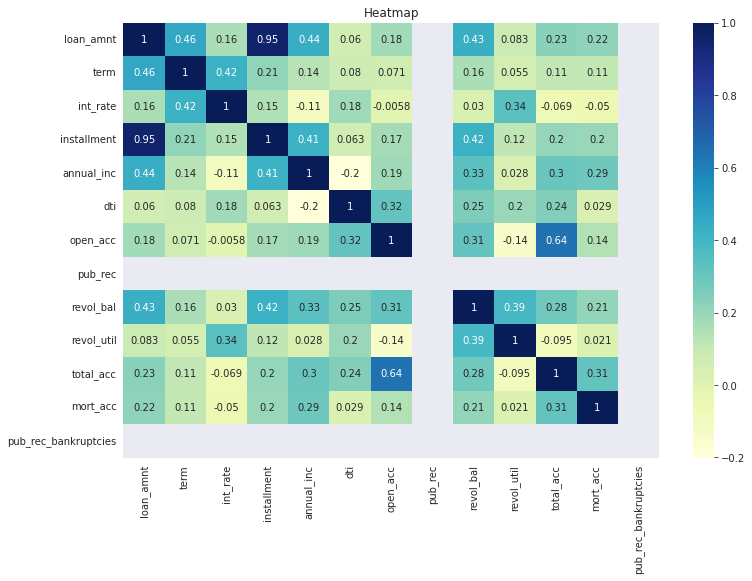

In [449]:
#Prepare corr dataframe and plot heatmap

plt.figure(figsize=(12,8))
df_corr = df.corr()
sns.heatmap(df_corr, cmap='YlGnBu', annot=True)
plt.title('Heatmap')
plt.show()

Observation1: Installment and loan_amnt are highly correlated

Observation2: open_acc and total_acc are having fairly good positive correlation

#### Data Preparation for ML

In [450]:
df1 = df.copy()

In [451]:
#Drop the variables which didn't show any significant impact on loan_status in above analysis

df1.drop(['emp_title'
          ,'emp_length'
          ,'initial_list_status'
          ,'issue_month'
          ,'issue_year'
          ,'er_cr_line_m'
          ,'er_cr_line_y'
          ,'address_state'
          ,'address_zip'
          ,'application_type'
          ,'verification_status'
          ,'purpose'
          ,'title'
          ,'sub_grade'],axis=1,inplace=True)

In [452]:
#OneHotEncode variable home_ownership

df1 = pd.get_dummies(df1, prefix=['home_ownership'] ,columns=['home_ownership'])

In [453]:
#Binary encode target variable loan_status

loan_status_dict = {
    'Fully Paid':1,
    'Charged Off':0
}
df1['loan_status'] = df1['loan_status'].map(loan_status_dict)

In [454]:
#OneHotEncode variable grade

df1 = pd.get_dummies(df1, prefix=['grade'], columns=['grade'])

In [455]:
#df1 = pd.get_dummies(df1, prefix=['sub_grade'], columns=['sub_grade'])

In [456]:
df1.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,10000.0,36,11.44,329.48,117000.0,1,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,1,22.05,17.0,0.0,20131.0,53.3,27.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,1,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,1,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0


#### Build ML model

In [457]:
#Import libraries

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import train_test_split

In [458]:
#Prepare X and y dataset i.e. independent and dependent datasets

X = df1.drop(['loan_status'], axis=1)
y = df1['loan_status']

In [459]:
#Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227172, 26)
(56794, 26)
(227172,)
(56794,)


In [460]:
#Standardize the data

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [461]:
#Fit the Model on training data

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [462]:
#Predit the data on test dataset

y_pred = model.predict(X_test)

In [463]:
print(f'Logistic Regression Model Score: ',end='')
print(round(model.score(X_test, y_test)*100,2))

Logistic Regression Model Score: 80.4


In [464]:
#Try with different regularization factor lamda and choose the best to build the model

lamb = np.arange(0.01, 10000, 100)

train_scores = [] 
test_scores = []

for lam in lamb:
    model = LogisticRegression(C = 1/lam)
    model.fit(X_train, y_train)

    tr_score = model.score(X_train, y_train)
    te_score = model.score(X_test, y_test)
    
    train_scores.append(tr_score)
    test_scores.append(te_score)

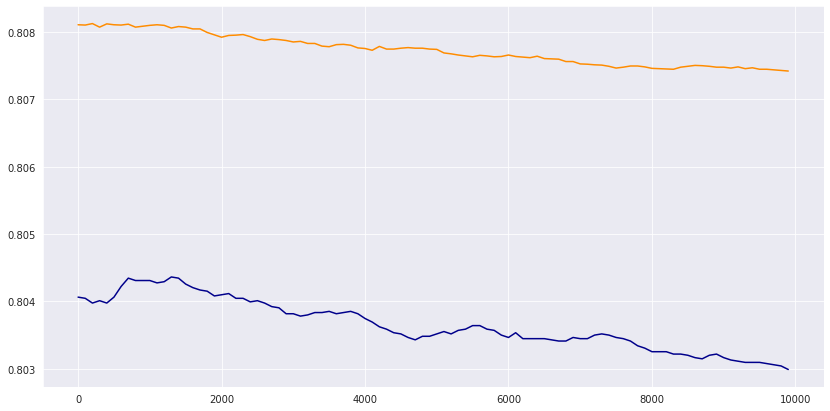

In [466]:
#Plot the train and test scores with respect lambda values i.e. regularization factore

plt.figure(figsize=(14,7))
sns.lineplot(np.arange(0.01,10000,100),test_scores,color='darkblue')
sns.lineplot(np.arange(0.01,10000,100),train_scores,color='darkorange')
plt.show()

In [467]:
#Check the index of best test score and the check the best test score

print(np.argmax(test_scores))
test_scores[9]

13


0.8043103144698384

In [468]:
#Calculate the best lambda value based on the index of best test score

best_lamb = 0.01 + 100*13

In [469]:
#Fit the model using best lambda

model = LogisticRegression(C=1/best_lamb)
model.fit(X_train, y_train)

LogisticRegression(C=0.0007692248521165222)

In [470]:
#Predict the y_values and y_probability values

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [471]:
#Print model score

print(f'Logistic Regression Model Score with best lambda: ',end='')
print(round(model.score(X_test, y_test)*100,2))

Logistic Regression Model Score with best lambda: 80.44


In [472]:
#Collect the model coefficients and print those in dataframe format
coeff_df = pd.DataFrame()
coeff_df['Coefficients'] = X_train.columns
coeff_df['Weights'] = model.coef_[0]
coeff_df['ABS_Weights'] = abs(coeff_df['Weights'])

In [473]:
#Sort the coeff in the order of their importance
coeff_df = coeff_df.sort_values(['ABS_Weights'], ascending=False)

#### Weights of features (coefficients)

In [474]:
#Display variable weights

coeff_df

,Coefficients,Weights,ABS_Weights
19,grade_A,0.241030,0.241030
1,term,-0.207522,0.207522
4,annual_inc,0.202030,0.202030
5,dti,-0.174596,0.174596
23,grade_E,-0.143177,0.143177
22,grade_D,-0.141095,0.141095
2,int_rate,-0.115519,0.115519
20,grade_B,0.105582,0.105582
6,open_acc,-0.104445,0.104445
24,grade_F,-0.099762,0.099762


In [475]:
#Top 5 important features

coeff_df.head(5)

,Coefficients,Weights,ABS_Weights
19,grade_A,0.241030,0.241030
1,term,-0.207522,0.207522
4,annual_inc,0.202030,0.202030
5,dti,-0.174596,0.174596
23,grade_E,-0.143177,0.143177


In [476]:
#Logistic Regression model intercept

model.intercept_

array([1.60102577])

#### Confusion Matrix

In [477]:
#Create confusion matrix and print the matrix

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

In [478]:
cm_df

,0,1
0,471,10774
1,337,45212


Class 0 : Charged Off (Here considering as negative class)

Class 1 : Fully Paid (Here considering as positive class)

1. TN = 471
2. TP = 45212
3. FP = 10774
4. FN = 337
5. Actual Negative (Charged Off)    = 471   + 10774 = 11245
6. Actual Positive (Fully Paid)     = 337   + 45212 = 45549
7. Predicted Negative (Charged Off) = 471   + 337   = 808
8. Predicted Positive (Fully Paid)  = 10774 + 45212 = 55986

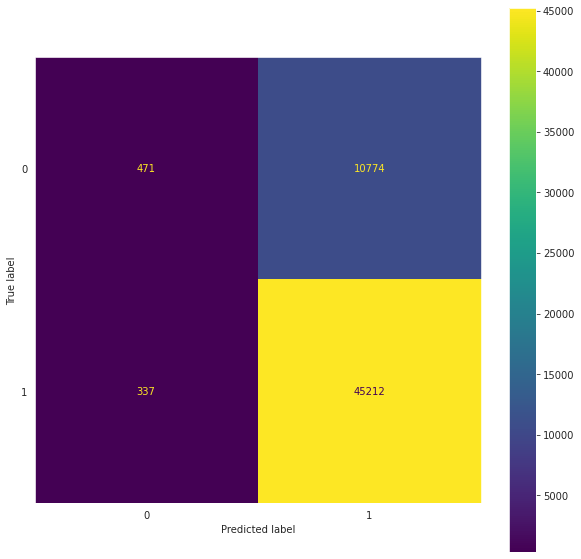

In [479]:
#Plot confusion Matrix

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_test, y_test, ax=ax)
plt.grid()
plt.show()

In [480]:
#Plot Confusion Matrix using different method

# fig, ax = plt.subplots(figsize=(10, 10))
# ConfusionMatrixDisplay(cm).plot(ax=ax);
# plt.grid()
# plt.show()

#### Classification Report

In [481]:
#Print classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.04      0.08     11245
           1       0.81      0.99      0.89     45549

    accuracy                           0.80     56794
   macro avg       0.70      0.52      0.48     56794
weighted avg       0.76      0.80      0.73     56794



Observations from classification report:

1. Precision : 0.81
2. Recall : 0.99
3. F1-score : 0.89
4. Accuracy : 0.80

In [482]:
print('Precision Score:', precision_score(y_test,y_pred).round(2))
print('Recall Score:', recall_score(y_test,y_pred).round(2))
print('F1 Score:', f1_score(y_test,y_pred).round(2))

Precision Score: 0.81
Recall Score: 0.99
F1 Score: 0.89


#### ROC AUC Curve

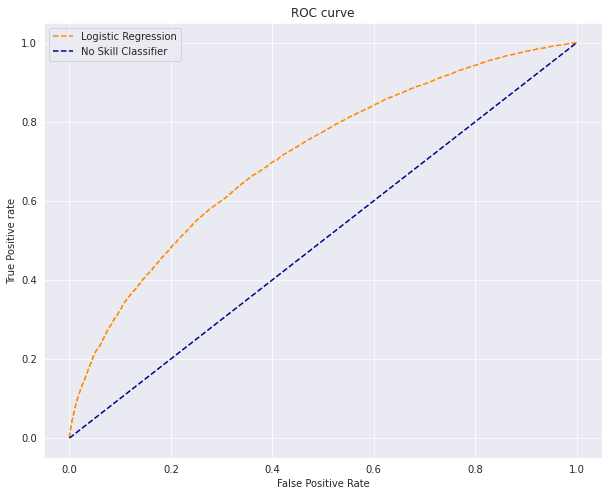

In [483]:
#Plot ROC curve
#ROC Curve summarizes trade off between TPR and FPR

random_probs = [0 for i in range(len(y_test))]

p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

fpr, tpr, thresh = roc_curve(y_test, y_pred_proba[:,1], pos_label=1)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, linestyle='--',color='darkorange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='darkblue', label='No Skill Classifier')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [484]:
roc_auc_score(y_test, y_pred_proba[:,1]).round(2)

0.71

Observations: (Answers to trade off questions)

1. Area under the ROC curve = 71%. That means we can say that the performance of the model is 0.71
2. Ideal scenario would be more TPR and lower FPR
3. Plot shows that True Positives increase at the cost of generating more False Positives
4. That means in order to find more Fully Paid customers, the model will have more chances of mistakenly classifying Charged Off customers as Fully Paid customers which might result in NPAs.
5. To avoid the NPAs, there is a necessity of bringing down the FPR while keeping the TPR in shape.
6. The model can detect the real defaulters when FPs (False Positives) are pushed towards left on x-axis
7. Once FPs (False Positives) towards left on X-axis the AUC will increase and hence the model performance
8. While FPs are moved towards left on X-axis, TPs need to remain high there on Y-axis

#### Precision Recall Curve

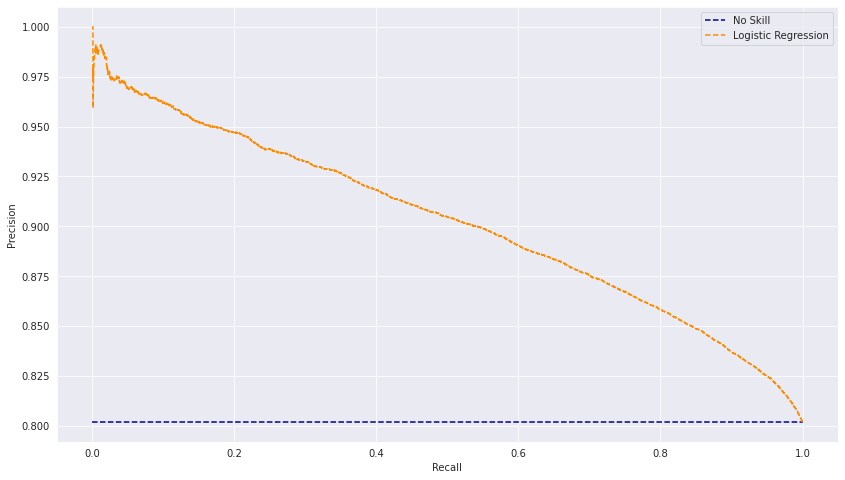

In [485]:
#Plot precision recall curve
#Reviewing both precision and recall is useful in cases where there is an imbalance in the observations 
#between the two classes.

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])

no_skill = len(y_test[y_test==1]) / len(y_test)

plt.figure(figsize=(14,8))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', color='darkblue')
plt.plot(recall, precision, linestyle='--', label='Logistic Regression', color='darkorange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

In [486]:
auc(recall, precision).round(3)

0.902

Observations: (Answering Trade Off question)
1. Precision recall curve is more useful in case of imbalanced data.
2. Calculation of precision and recall do not make use of the true negatives. So, it focuses on the correct prediction of one of the class. In our case that class is Class 1 i.e. Fully Paid customers
3. If you see the confusion matrix, the upper left box just won't be used in these calculations.
4. AUC = 90.4% which is failry good.
5. We can see that as the recall increases the precision is falling down.
6. For a strong model, both the recall and precision should be high
7. For a good trade off the precision needs to stay high on y-axis as recall progress towards right on x-axis
8. This shows that in order to increase the performance of model, precision needs to be improved
9. Increase precision means, there needs to be low FPs (False Positives)
10. So, here we need to focus more on reducing the FPs

#### Extra analysis for questionaire and recommendations

In [487]:
#Loan Status for term = 60 months
print(df.loc[df['term']==' 60 months']['loan_status'].value_counts(normalize=True))

print('--------------')
#Loan Status for term = 36 months
print(df.loc[df['term']==' 36 months']['loan_status'].value_counts(normalize=True))

print('--------------')
#Loan status for grade A
print(df.loc[df['grade']=='A']['loan_status'].value_counts(normalize=True))

print('--------------')
#Median annual income of defaulters
print(np.percentile(df.loc[df['loan_status'] == 'Charged Off']['annual_inc'],50))

print('--------------')
#Median annual income of fully paid customers
print(np.percentile(df.loc[df['loan_status'] == 'Fully Paid']['annual_inc'],50))

print('--------------')
#Median dti ratio of Charged Off customers
print(np.percentile(df.loc[df['loan_status'] == 'Charged Off']['dti'],50))

print('--------------')
#Median dti ratio of Fully Paid customers
print(np.percentile(df.loc[df['loan_status'] == 'Fully Paid']['dti'],50))

print('--------------')
print(df.loc[df['grade']=='E']['loan_status'].value_counts(normalize=True))

print('--------------')
print(df.loc[df['grade']=='D']['loan_status'].value_counts(normalize=True))

print('--------------')
print(np.percentile(df.loc[df['loan_status'] == 'Charged Off']['int_rate'],50))

print('--------------')
print(np.percentile(df.loc[df['loan_status'] == 'Fully Paid']['int_rate'],50))

Series([], Name: loan_status, dtype: float64)
--------------
Series([], Name: loan_status, dtype: float64)
--------------
Fully Paid     0.936621
Charged Off    0.063379
Name: loan_status, dtype: float64
--------------
55000.0
--------------
60000.0
--------------
19.34
--------------
16.45
--------------
Fully Paid     0.618436
Charged Off    0.381564
Name: loan_status, dtype: float64
--------------
Fully Paid     0.704555
Charged Off    0.295445
Name: loan_status, dtype: float64
--------------
15.61
--------------
12.69


### Questionaire

#### Question 1: What percentage of customers have fully paid their Loan Amount?

Answer: 80.38%

#### Question 2: Comment about the correlation between Loan Amount and Installment features?

Answer: Loan amount and installment has very strong positive correlation of 0.95

#### Question 3: The majority of people have home ownership as ______.

Answer: Mortgage i.e. 50.08%

#### Question 4: People with grades ‘A’ are more likely to fully pay their loan. (T/F)

Answer: True. Out of All people with grade A, 93.71% are Fully Paid and only 6.29% are Charged Off

#### Question 5: Name the top 2 afforded job titles.

Answer: Teacher and Manager.

#### Question 6: Thinking from a bank's perspective, which metric should our primary focus be on..
    a. ROC AUC
    b. Precision
    c. Recall
    d. F1 Score

Answer: 

    1. Bank's primary focus should be on ROC AUC 
    2. Because bank needs to reduce FPR (False Positive Rate) and needs to increase the TPR (True Positive Rate). 
    3. In common man's term, Bank should not classify Charged Off customers as Fully Paid i.e. False Positives
    4. And bank should not classify Fully Paid customers as Charged Off i.e. False Negatives


#### Question 6: How does the gap in precision and recall affect the bank?

Answer:

    1. A perfect precision recall curve is depicted as a point (1,1). 
    2. High performance model is represented by a curve that bows towards point (1,1) above the flat line of no skill. 
    3. So, the gap between precision and recall will affect the bank. As the gap widens, there will be increase in incorrect predictions.
    4. Good precision means less False Positives. i.e. Less NPA loan accounts. 
    5. Good recall means less False Negatives. i.e. not loosing on good customer.


#### Question 7: Which were the features that heavily affected the outcome?

Answer: Top 5 Features that affected the outcome are -

    1. Grade
    2. Term
    3. Annual income
    4. dti
    5. int_rate

#### Question 8: Will the results be affected by geographical location? (Yes/No)

Answer: No. The results will not be affected by the geographical locaion. See the bar graph plotted above.

## Business Recommendations

1. Customers with Grade A are the most reliable on the repayments. Bank can extend the credit line to these customers and should focus and adding more new customers to list of borrowers. 93% of these have a track record of repaying their loan.

2. The term period of 60 months is a trouble when it comes to Charged Off accounts. 32% of accounts from 60 months term period turned into NPA based on the data available. So, here needs to rethink on the repayment terms.

3. The median annual income of Charged Off customers is 59K which is 6K less than median annual income of Fully Paid customers (65K). Please revisit the annual income thresholds while extending the credit lines to the customers.

4. The median dti ratio of Charged Off customers is 19.34 which is 3 points higher than the fully paid customers. Please give it a thought. This feature tops in first 5 most impactful features. 

5. 37% of the grade E and 28% of the grade D customers are defaulters from historical data. The needs to put more stringent criteria and the grade E and D customers.

6. Median interest rates of defaulter customers are 2.62% higher than those of regular. Median interest rate of regualr customers is 12.99% and for defaulters it's found that median interest rate is 15.61%. If the customer interest rates crawl above the alarming thresholds then that account is more probably more prone to become an NPA

7. Apart from this, the bank needs to focus more on improving the precision of correctly identifying the Charged Off customer. Becuase the current historical data trend shows that the bank is not so accurate in classifying the Charged Off customers. However these customers often get the green pass as a result of high FPR (False Positive Rate). 

## -------------------------------------------------------------------------------------------

#### Logistic Regression using StatsModel

The results using statsmodel are not that assuring as it will need very large number of iterations on fit(). So the recommendations are based on predictions from sklearn model. Not much efforts are spent on statsmodel. Please consider sklearn model as primary for evaluation purpose.

In [345]:
#Import Library
import statsmodels.api as sm

In [350]:
X_sm = X.copy()
y_sm = y.copy()

In [351]:
X_sm.shape, y_sm.shape

((283966, 26), (283966,))

In [352]:
#To address LinAlgError : Singular Matrix in Logit.fit()

print(X_sm['pub_rec'].value_counts())
print(X_sm['pub_rec_bankruptcies'].value_counts())
X_sm = X_sm.drop(['pub_rec','pub_rec_bankruptcies'],axis=1)

0.0    283966
Name: pub_rec, dtype: int64
0.0    283966
Name: pub_rec_bankruptcies, dtype: int64


In [353]:
#Split data into train and test

X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [354]:
X_sm_train.shape, y_sm_train.shape, X_sm_test.shape, y_sm_test.shape

((227172, 24), (227172,), (56794, 24), (56794,))

In [355]:
#Standardize the data

scaler = StandardScaler()
scaler.fit(X_sm_train)
X_sm_train = scaler.transform(X_sm_train)
X_sm_test = scaler.transform(X_sm_test)
X_sm_train = pd.DataFrame(X_sm_train, columns=X_sm.columns)
X_sm_test = pd.DataFrame(X_sm_test, columns=X_sm.columns)

In [356]:
#Bring the data in correct shape to be accepted by Logit model

y_sm_train = np.asarray(y_sm_train).reshape(-1,1)
y_sm_train = pd.DataFrame(y_sm_train,columns=['loan_status'])

In [357]:
#Train the model

log_reg = sm.Logit(y_sm_train,X_sm_train).fit(maxiter=50)

         Current function value: 0.665759
         Iterations: 50


/home/swapnil_machine/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [358]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               227172
Model:                          Logit   Df Residuals:                   227149
Method:                           MLE   Df Model:                           22
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                 -0.3539
Time:                        14:59:06   Log-Likelihood:            -1.5124e+05
converged:                      False   LL-Null:                   -1.1171e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
loan_amnt                   0.1312      0.033      4.030      0.000       0.067       0.195
term                       -0.2029      0.012    -17.611      0.000      -0.225      -0.180


Observations:
1. As we see the model did not converged and results are not that assuring
2. We are not trying with more iterations as it is time consuming and we have already implemented the model with sklearn

In [362]:
y_sm_pred = log_reg.predict(X_sm_test)

In [366]:
y_sm_pred = list(map(round, y_sm_pred))

In [367]:
cm_sm = confusion_matrix(y_sm_test, y_sm_pred)
cm_sm_df = pd.DataFrame(cm_sm, index=np.unique(y_sm_test), columns=np.unique(y_sm_test))

In [368]:
cm_sm_df

,0,1
0,7826,3419
1,17885,27664
